# Bias-Variance Trade-Off Demonstration

In this notebook, we demonstrate the bias-variance trade-off using a synthetic dataset.

We create a simple dataset with only one feature and one target variable. The target is generated using a nonlinear function with added noise. This setup allows us to clearly show how different models (with different complexity) behave in terms of bias and variance.

We will:

- Generate and visualize the dataset
- Fit linear and polynomial regression models
- Evaluate and visualize their predictions
- Discuss underfitting, overfitting, and the ideal balance between bias and variance

## Dataset Creation and Train-Test Split

We generate a synthetic dataset with one feature and one target variable, where the target is a noisy quadratic function of the feature.

To evaluate model performance properly and observe overfitting or underfitting, we split the dataset into a **training set (70%)** and a **test set (30%)**.

The plot below shows the training points in blue and the test points in orange.

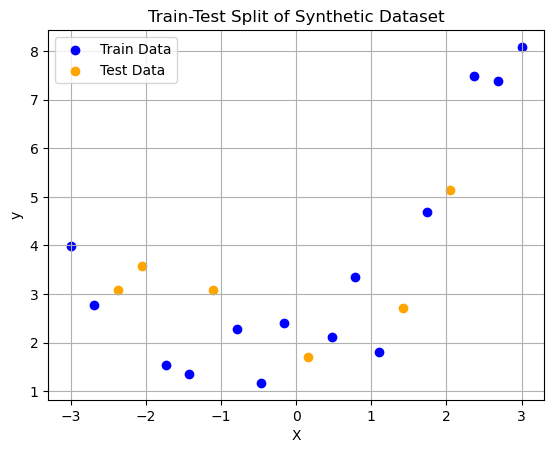

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create synthetic dataset
X = np.linspace(-3, 3, 20).reshape(-1, 1)
y = 0.5 * X.flatten()**2 + X.flatten() + 2 + np.random.normal(0, 1, size=X.shape[0])

# Split into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Wrap into DataFrames for easier plotting later
df_train = pd.DataFrame({"X": X_train.flatten(), "y": y_train})
df_test = pd.DataFrame({"X": X_test.flatten(), "y": y_test})

# Visualize the data
plt.scatter(df_train["X"], df_train["y"], color='blue', label="Train Data")
plt.scatter(df_test["X"], df_test["y"], color='orange', label="Test Data")
plt.title("Train-Test Split of Synthetic Dataset")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

## Linear Regression (High Bias)

We train a linear regression model using only the training data and evaluate its performance on both the training and test sets.

Since the true relationship is quadratic, the linear model is too simple to capture it — this leads to **underfitting**, also known as **high bias**.

The red line in the plot shows the prediction of the linear model. It doesn't follow the curvature of the data very well.

We report the Mean Squared Error (MSE) for both training and test sets to quantify the performance. A high MSE on both indicates underfitting.

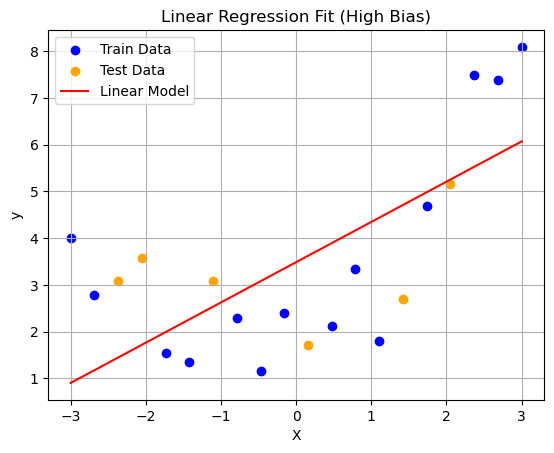

Train MSE: 2.81
Test MSE: 2.35


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train linear regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict
y_train_pred_linear = linear_model.predict(X_train)
y_test_pred_linear = linear_model.predict(X_test)

# Plot
plt.scatter(X_train, y_train, color='blue', label="Train Data")
plt.scatter(X_test, y_test, color='orange', label="Test Data")
x_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
y_plot = linear_model.predict(x_plot)
plt.plot(x_plot, y_plot, color='red', label="Linear Model")
plt.title("Linear Regression Fit (High Bias)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# Errors
mse_train = mean_squared_error(y_train, y_train_pred_linear)
mse_test = mean_squared_error(y_test, y_test_pred_linear)

print(f"Train MSE: {mse_train:.2f}")
print(f"Test MSE: {mse_test:.2f}")

## Polynomial Regression (High Variance) – Degree 12

We now fit a polynomial regression model of degree 12. This model is even more flexible and can nearly memorize the training data.

This high flexibility leads to **overfitting**: the model performs extremely well on the training set but fails to generalize to the test set.

The green curve shows a very complex shape that captures the noise in the training data. As a result, the training error becomes very low while the test error increases, which is a typical sign of **high variance**.

In [3]:
# Polynomial regression model (degree 12)
poly_model = make_pipeline(PolynomialFeatures(degree=12), LinearRegression())
poly_model.fit(X_train, y_train)

# Predict
y_train_pred_poly = poly_model.predict(X_train)
y_test_pred_poly = poly_model.predict(X_test)

# Plot
plt.scatter(X_train, y_train, color='blue', label="Train Data")
plt.scatter(X_test, y_test, color='orange', label="Test Data")
x_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
y_plot_poly = poly_model.predict(x_plot)
plt.plot(x_plot, y_plot_poly, color='green', label="Polynomial Model (deg 12)")
plt.title("Polynomial Regression Fit (High Variance)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# Errors
mse_train_poly = mean_squared_error(y_train, y_train_pred_poly)
mse_test_poly = mean_squared_error(y_test, y_test_pred_poly)

print(f"Train MSE: {mse_train_poly:.2f}")
print(f"Test MSE: {mse_test_poly:.2f}")

NameError: name 'make_pipeline' is not defined

## Model Comparison: Bias vs. Variance

The plot below compares the predictions of the linear regression model (red) and the degree-12 polynomial regression model (green).

- The **linear model** is too simple and cannot capture the true relationship — this is **underfitting** and results in high **bias**.
- The **polynomial model** is too complex and fits the training data very closely — this is **overfitting** and results in high **variance**.

### Mean Squared Error (MSE)

We also compare the models numerically using MSE:

- A **high training and test error** → underfitting (high bias)
- A **low training error but high test error** → overfitting (high variance)

The ideal model balances between bias and variance — low enough error on both training and test sets.

This simple experiment shows how model complexity affects generalization.

In [ ]:
# Prediction curves
x_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
y_linear_plot = linear_model.predict(x_plot)
y_poly_plot = poly_model.predict(x_plot)

# Plot both models
plt.scatter(X_train, y_train, color='blue')
plt.scatter(X_test, y_test, color='orange')
plt.plot(x_plot, y_linear_plot, color='red', label="Linear Model")
plt.plot(x_plot, y_poly_plot, color='green', label="Polynomial Model (deg 12)")
plt.title("Linear vs Polynomial Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# Show comparison of MSE
print(f"Linear Regression - Train MSE: {mse_train:.2f}, Test MSE: {mse_test:.2f}")
print(f"Polynomial Regression (deg 12) - Train MSE: {mse_train_poly:.2f}, Test MSE: {mse_test_poly:.2f}")

## Ideal Model: Polynomial Regression (Degree 2)

We now fit a polynomial regression model of degree 2, which matches the underlying function used to generate the data.

This model strikes a good balance between **bias** and **variance**:

- It is flexible enough to capture the true pattern in the data.
- It does not overfit the noise.
- It generalizes well to the test set.

The **purple curve** in the plot shows the ideal fit. Compared to the linear model (red) and the overfit polynomial model (green), the degree-2 model provides the most reliable generalization.

Its MSE values on both training and test sets are relatively low and close to each other — indicating a healthy bias-variance trade-off.

In [ ]:
# Polynomial regression model (degree 2)
ideal_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
ideal_model.fit(X_train, y_train)

# Predict
y_train_pred_ideal = ideal_model.predict(X_train)
y_test_pred_ideal = ideal_model.predict(X_test)

# Plot
y_plot_ideal = ideal_model.predict(x_plot)

plt.scatter(X_train, y_train, color='blue')
plt.scatter(X_test, y_test, color='orange')

# Transparent lines for high bias and high variance models
plt.plot(x_plot, y_linear_plot, color='red', linestyle='--', alpha=0.5, label="Linear Model")
plt.plot(x_plot, y_poly_plot, color='green', linestyle='--', alpha=0.5, label="Polynomial (deg 12)")

# Bold line for ideal model
plt.plot(x_plot, y_plot_ideal, color='purple', linewidth=3, label="Polynomial (deg 2)")

plt.title("Ideal Fit: Polynomial Regression (Degree 2)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# MSE
mse_train_ideal = mean_squared_error(y_train, y_train_pred_ideal)
mse_test_ideal = mean_squared_error(y_test, y_test_pred_ideal)

print(f"Polynomial Regression (deg 2) \nTrain MSE: {mse_train_ideal:.2f}, \nTest MSE: {mse_test_ideal:.2f}")

## Conclusion

In this notebook, we explored the concept of the **bias-variance trade-off** through three different regression models:

- A **Linear Regression model** (degree 1), which suffered from **high bias** and **underfit** the data.
- A **Polynomial Regression model** of **degree 12**, which had **high variance** and **overfit** the data.
- A **Polynomial Regression model** of **degree 2**, which closely matched the true data-generating function and achieved a good balance between bias and variance.

By visualizing the predictions and comparing training vs. test performance using **Mean Squared Error (MSE)**, we clearly saw how model complexity affects generalization.

The key takeaway:  
> A model that is too simple fails to capture the patterns in data (underfitting),  
> while a model that is too complex captures noise as well (overfitting).  
> The goal is to find a model that is **just right** — flexible enough to learn the pattern but simple enough to generalize.

This notebook demonstrated that principle using a small, interpretable dataset.